# Today's news yesterday

Version 2 of the Trove API fixed a problem with date searching. At last you can search for articles published on a particular day!

There's a trick though. If you want to find articles from 2 November 1942, you have to search for a date range from 1 November to 2 November. This is what the query would look like:

```
date:[1942-11-01T00:00:00Z TO 1942-11-02T00:00:00Z]
```

Once you know that, it's not too hard to do things like find front pages from exactly 100 years ago. This notebook shows you how.

<div class="alert alert-block alert-warning">
<p>If you haven't used one of these notebooks before, they're basically web pages in which you can write, edit, and run live code. They're meant to encourage experimentation, so don't feel nervous. Just try running a few cells and see what happens!.</p>

<p>
    Some tips:
    <ul>
        <li>Code cells have boxes around them.</li>
        <li>To run a code cell click on the cell and then hit <b>Shift+Enter</b>. The <b>Shift+Enter</b> combo will also move you to the next cell, so it's a quick way to work through the notebook.</li>
        <li>While a cell is running a <b>*</b> appears in the square brackets next to the cell. Once the cell has finished running the asterix will be replaced with a number.</li>
        <li>In most cases you'll want to start from the top of notebook and work your way down running each cell in turn. Later cells might depend on the results of earlier ones.</li>
        <li>To edit a code cell, just click on it and type stuff. Remember to run the cell once you've finished editing.</li>
    </ul>
</p>
</div>

## Get things ready

In [26]:
import os
import random
import re
import shutil

import arrow
import requests
from IPython.display import Image, display

## Set your API key

In [27]:
%%capture
# Load variables from the .env file if it exists
# Use %%capture to suppress messages
%load_ext dotenv
%dotenv

In [28]:
# Insert your Trove API key
API_KEY = "YOUR API KEY"

# Use api key value from environment variables if it is available
if os.getenv("TROVE_API_KEY"):
    API_KEY = os.getenv("TROVE_API_KEY")

## Create a date query

In [29]:
# Get today's date
now = arrow.now("Australia/Canberra")
# Go back in time 100 years
end = now.shift(years=-100)
# Subtract an extra day for the start of the date range
start = end.shift(days=-1)
# Format the query
date_query = "date:[{}Z TO {}Z]".format(
    start.format("YYYY-MM-DDT00:00:00"), end.format("YYYY-MM-DDT00:00:00")
)
date_query

'date:[1922-01-18T00:00:00Z TO 1922-01-19T00:00:00Z]'

## Set up API request parameters

Note that we're adding `firstpageseq:1` to the date query. This limits results to articles on the front page. We can then get the identifier of the front page from the article record.

In [30]:
# Set up parameters for our API query
# <-- Click the run icon
params = {
    "zone": "newspaper",
    "reclevel": "full",
    "encoding": "json",
    "n": "100",
    "q": "{} firstpageseq:1".format(date_query),
    "key": API_KEY,
}

api_url = "http://api.trove.nla.gov.au/v2/result"

## Make the API request

In [31]:
response = requests.get(api_url, params=params)
data = response.json()
articles = data["response"]["zone"][0]["records"]["article"]

## Select and download a front page

Our API request returned a maximum of 100 articles. This function selects one at random, then downloads the front page.

In [32]:
def get_front_page():
    # Select a random article
    article = random.sample(articles, 1)[0]
    # Get the front page identifier from the page url
    page_id = re.search(r"page\/(\d+)", article["trovePageUrl"]).group(1)
    # Construct the url we need to download the image
    page_url = "http://trove.nla.gov.au/ndp/imageservice/nla.news-page{}/level2".format(
        page_id
    )
    # Download the page image
    response = requests.get(page_url, stream=True)
    with open("data/frontpage.jpg", "wb") as out_file:
        shutil.copyfileobj(response.raw, out_file)

## Display the front page

First we use the function defined above to download a randomly-selected front page, and then we display it.

Re-run this cell for a different page.

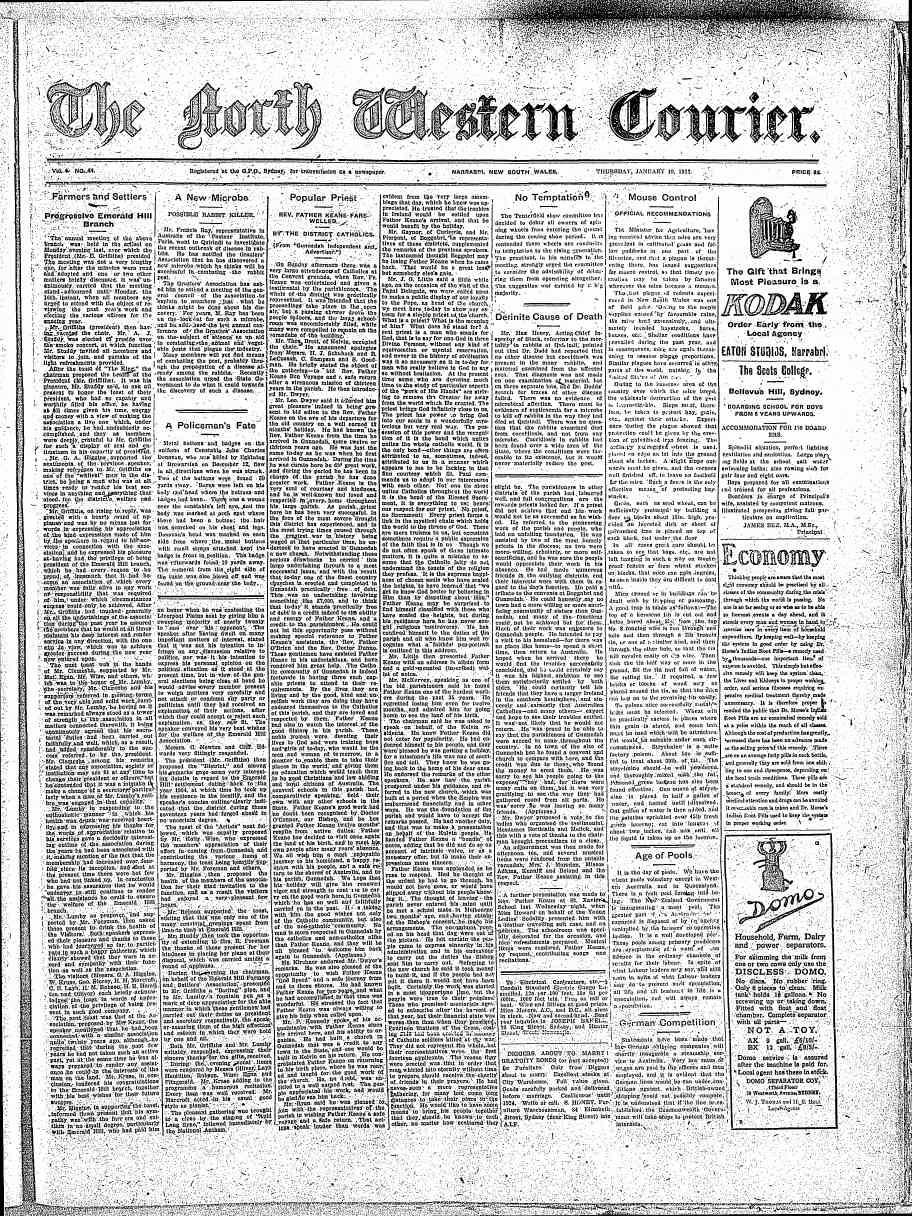

In [35]:
get_front_page()
display(Image(filename="data/frontpage.jpg"))

----

Created by [Tim Sherratt](https://timsherratt.org/) for the [GLAM Workbench](https://glam-workbench.github.io/).  
Support this project by becoming a [GitHub sponsor](https://github.com/sponsors/wragge?o=esb).

